In [1]:
# fetching dataset
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
## Get the Data and Pre-process it.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

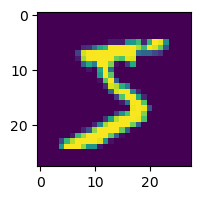

In [4]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])
plt.show()

In [5]:
def plot_img(i):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

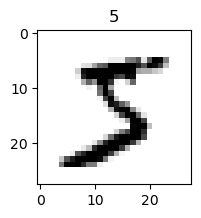

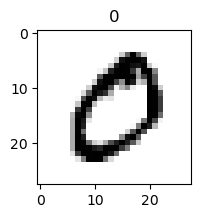

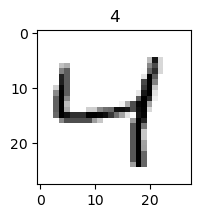

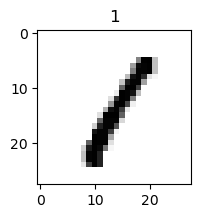

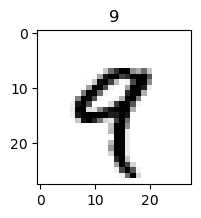

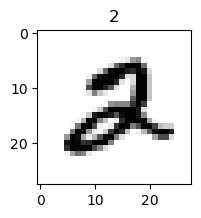

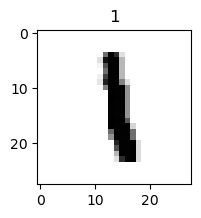

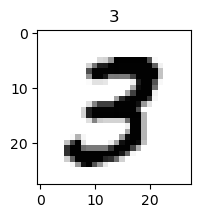

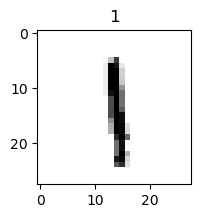

In [6]:
for i in range(9):
    plot_img(i)

In [7]:
## Pre-process the images

# Normalizing the image to [0, 1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Reshape / Expand the dimension of images (28, 28) to (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test.shape

(10000, 28, 28, 1)

In [10]:
# Convert classes into one hot vectors

y_train = keras.utils.to_categorical(y_train)

y_test = keras.utils.to_categorical(y_test)

In [11]:
# Start Building Model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation='relu' ))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu' ))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.25))   # to handle overfitting

model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [13]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [14]:
# callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

# ModelCheckpoint

mc = ModelCheckpoint("./bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only = True)

cb = [es,mc]

In [15]:
## Model Training

In [16]:
his = model.fit(X_train, y_train, epochs = 50, validation_split = 0.3, callbacks = cb)

Epoch 1/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.2183 - accuracy: 0.9347
Epoch 1: val_accuracy improved from -inf to 0.97744, saving model to .\bestmodel.h5
1313/1313 [==============================] - 32s 24ms/step - loss: 0.2183 - accuracy: 0.9347 - val_loss: 0.0753 - val_accuracy: 0.9774
Epoch 2/50
   4/1313 [..............................] - ETA: 31s - loss: 0.0707 - accuracy: 0.9609 

C:\Users\Computer HuB\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1312/1313 [============================>.] - ETA: 0s - loss: 0.0715 - accuracy: 0.9774
Epoch 2: val_accuracy improved from 0.97744 to 0.98161, saving model to .\bestmodel.h5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0715 - accuracy: 0.9775 - val_loss: 0.0566 - val_accuracy: 0.9816
Epoch 3/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0550 - accuracy: 0.9826
Epoch 3: val_accuracy improved from 0.98161 to 0.98400, saving model to .\bestmodel.h5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0532 - val_accuracy: 0.9840
Epoch 4/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0447 - accuracy: 0.9856
Epoch 4: val_accuracy improved from 0.98400 to 0.98561, saving model to .\bestmodel.h5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0446 - accuracy: 0.9856 - val_loss: 0.0480 - val_accuracy: 0.9856
Epoch 5/50
1313/1313 [=============================

In [17]:
model_S = keras.models.load_model("C://Users//Computer Hub//Bharat Intern Project//bestmodel.h5")

In [18]:
import os
print(os.getcwd())

C:\Users\Computer HuB\Bharat Intern Project


In [19]:
score_train = model_S.evaluate(X_train, y_train)
print(f"The model accuracy on train data is {score_train[1]} ")

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0351 - accuracy: 0.9893
The model accuracy on train data is 0.9892500042915344 


In [20]:
score_test = model_S.evaluate(X_test, y_test)
print(f"The model accuracy on test data is {score_test[1]} ")

313/313 [==============================] - 2s 7ms/step - loss: 0.0414 - accuracy: 0.9871
The model accuracy on test data is 0.9871000051498413 


 **As we can see on the train data accuracy is 0.99 (99%) and on the test data accuracy is 0.98 (98%) which is good.**

In [21]:
pred = model_S.predict(X_test)
pred

313/313 [==============================] - 2s 6ms/step


array([[6.21815666e-09, 3.01168396e-10, 1.39963058e-05, ...,
        9.99976754e-01, 1.75104560e-07, 8.67911069e-07],
       [6.93066177e-05, 1.74811103e-05, 9.99864459e-01, ...,
        1.39931491e-12, 6.30860040e-06, 3.68054892e-12],
       [4.10099460e-07, 9.99626398e-01, 2.58113141e-06, ...,
        2.34091222e-05, 5.09423990e-05, 1.04556754e-07],
       ...,
       [6.52602294e-14, 3.24639655e-11, 2.84993491e-12, ...,
        3.40901840e-09, 1.22261303e-08, 4.52661642e-09],
       [6.31552211e-06, 3.39609937e-11, 5.89472693e-09, ...,
        1.38575773e-09, 9.59320110e-04, 2.12583288e-07],
       [8.51305231e-05, 1.77423312e-10, 3.56913756e-06, ...,
        3.59648184e-12, 5.93410878e-05, 5.24684030e-09]], dtype=float32)

In [22]:
# Converting prediction data from one hot encoded lables to integer 
predicted_labels = np.argmax(pred, axis=1)
predicted_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
# Converting one-hot encoded labels to integer labels
y_test_int = np.argmax(y_test, axis=1)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Now calculate metrics using y_test_int and predicted_labels
accuracy = accuracy_score(y_test_int, predicted_labels)
precision = precision_score(y_test_int, predicted_labels, average='weighted')
recall = recall_score(y_test_int, predicted_labels, average='weighted')
f1 = f1_score(y_test_int, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9871
Precision: 0.9871753241603867
Recall: 0.9871
F1-score: 0.9870879954511486


In [25]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_int, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 977    0    0    0    0    0    0    1    2    0]
 [   0 1128    3    1    1    0    1    0    1    0]
 [   2    0 1023    0    2    0    0    1    4    0]
 [   0    0    2 1002    0    3    0    1    2    0]
 [   1    0    0    0  981    0    0    0    0    0]
 [   1    0    0    4    0  883    1    1    2    0]
 [   8    2    1    0    5    4  938    0    0    0]
 [   0    2   10    3    0    0    0 1008    1    4]
 [   5    0    4    1    2    0    0    3  955    4]
 [   3    3    1    1   13    6    0    4    2  976]]


In [26]:
from sklearn.metrics import classification_report

report = classification_report(predicted_labels, y_test_int)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       997
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1044
           3       0.99      0.99      0.99      1012
           4       1.00      0.98      0.99      1004
           5       0.99      0.99      0.99       896
           6       0.98      1.00      0.99       940
           7       0.98      0.99      0.98      1019
           8       0.98      0.99      0.98       969
           9       0.97      0.99      0.98       984

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



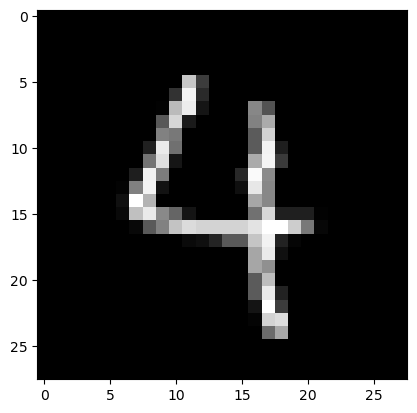

In [27]:
# Let's test the model
image_to_visualize = X_test[24]  # Accessing the 25th sample from X_test
plt.imshow(image_to_visualize.reshape(28, 28), cmap='gray')  # Display the image
plt.show()


In [28]:
predicted_labels[24]

4

**Insight**:    According to the above result our model is working good.